# Import libraries 

In [ ]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Read data 

In [7]:
train = pd.read_csv(r'C:\Users\User\Downloads\umoja\Train.csv')
test = pd.read_csv(r'C:\Users\User\Downloads\umoja\Test.csv')
ss = pd.read_csv(r'C:\Users\User\Downloads\umoja\SampleSubmission.csv')
variable_def = pd.read_csv(r'C:\Users\User\Downloads\umoja\VariableDefinitions.csv')

# Simple EDA

In [8]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [93]:
d = train["Subject_Car_Make"]
db = d.unique()
d_length = (len(db))
print('this is the length of car make: ',d_length)
dba = d.nunique()
#print(dba)
#print(db)
db



this is the length of car make:  75


array(['TOYOTA', nan, 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', '.', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'As Attached', 'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler',
       'Dodge', 'GMC', 'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel',
       'Astra', 'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj'],
      dtype=object)

In [94]:
P_Name = train.ProductName.unique()
P_Name

array(['Car Classic', 'CarSafe', 'Muuve', 'CVTP', 'Car Plus',
       'Motor Cycle', 'Customized Motor', 'CarFlex', 'Car Vintage'],
      dtype=object)

In [20]:
train["Subject_Car_Colour"].isnull

<bound method Series.isnull of 0        Black
1         Grey
2          Red
3          NaN
4          NaN
         ...  
12074    Black
12075      NaN
12076      NaN
12077    White
12078    Black
Name: Subject_Car_Colour, Length: 12079, dtype: object>

In [31]:
sum =0
col = train.columns

for i col:
    d =col.isnull()
    
    if i == col:
        

d = train["Subject_Car_Colour"].isnull()
for i in d:
    if i == True:
        sum += 1
print("missing car colour",sum)
print(len(train["Subject_Car_Colour"]))

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')
missing car colour 6962
12079


In [80]:
gender = train['Gender'].nunique()
gender

7

In [45]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [ ]:
ss.head()

In [47]:
variable_def

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [10]:
print('Train shape:',train.shape,'\nTest shape:', test.shape, '\nsamplesubmission shape:',ss.shape)

Train shape: (12079, 14) 
Test shape: (5177, 13) 
samplesubmission shape: (5177, 2)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [ ]:
test.info()

# Since the ratio of categorical variables to numerical variable is high, consider combining both train and test for easy preproccessing 

In [54]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (17256, 14)


In [ ]:
all_data.tail()

In [ ]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age']
cat_col = [col for col in test.columns if col not in date_col+num_col]
cat_col

In [ ]:
cat_col.remove('ID')

In [ ]:
train.describe()

In [ ]:
test.describe()

In [ ]:
sns.countplot(train.target)

The dataset is is skewed towards class 0, consider balancing the dataset 

In [ ]:
print("Are There Missing value in train? :",train.isnull().any().any())
print((train.isnull().sum()/train.shape[0])*100)

In [ ]:
print("Are There Missing value in test? :",test.isnull().any().any())
print((test.isnull().sum()/test.shape[0])*100)

Remember to handle the missing values 

In [ ]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

### Correlation might not be a best measure for this dataset since there are more categorical features

In [ ]:
all_data.head()

In [52]:
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

In [ ]:
check_categorical_relationship(cat_col,'Age',all_data)

In [ ]:
check_categorical_relationship(cat_col,'No_Pol',all_data)

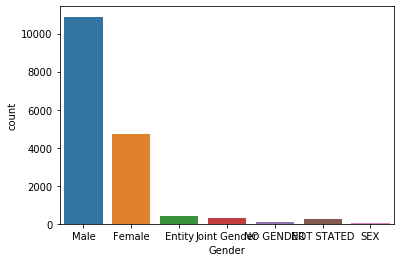

In [55]:
# Gender distribution 
sns.countplot(all_data.Gender)

In [ ]:
all_data.Gender.unique()

# Basic Data preprocessing 

In [ ]:
train.head()

### fill mising value

In [ ]:
all_data = all_data.fillna(9999)
all_data.head()

In [56]:
print("Are There still Missing value in data? :",all_data.isnull().any().any())
print((all_data.isnull().sum()/all_data.shape[0])*100)

Are There still Missing value in data? : True
ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     2.984469
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              31.154381
Subject_Car_Colour        57.759620
Subject_Car_Make          20.497218
LGA_Name                  53.650904
State                     53.755216
ProductName                0.000000
target                    30.001159
dtype: float64


### date features

In [ ]:
date_col

In [ ]:
for feat in date_col:
    all_data[feat] = pd.to_datetime(all_data[feat])

In [57]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17256 entries, 0 to 17255
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      17256 non-null  object 
 1   Policy Start Date       17256 non-null  object 
 2   Policy End Date         17256 non-null  object 
 3   Gender                  16741 non-null  object 
 4   Age                     17256 non-null  int64  
 5   First Transaction Date  17256 non-null  object 
 6   No_Pol                  17256 non-null  int64  
 7   Car_Category            11880 non-null  object 
 8   Subject_Car_Colour      7289 non-null   object 
 9   Subject_Car_Make        13719 non-null  object 
 10  LGA_Name                7998 non-null   object 
 11  State                   7980 non-null   object 
 12  ProductName             17256 non-null  object 
 13  target                  12079 non-null  float64
dtypes: float64(1), int64(2), object(11)
me

In [ ]:
all_data.head()

In [61]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.quarter
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [62]:
extract_date_info(all_data,date_col)

NameError: name 'date_col' is not defined

In [72]:
all_data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,NaN,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,NaN,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,NaN,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,NaN,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,NaN,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17251,ZYXX5AF,2010-07-18,2011-07-17,NaN,48,2010-07-18,1,Saloon,NaN,Honda,NaN,NaN,CarSafe,NaN
17252,ZYYOZ5L,2010-12-04,2011-12-03,NaN,50,2010-12-04,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,NaN
17253,ZZ1GTKD,2010-09-24,2011-09-23,NaN,1,2010-09-24,1,NaN,NaN,NaN,NaN,NaN,CarSafe,NaN
17254,ZZDXQSI,2010-07-17,2011-07-16,NaN,52,2010-07-17,1,Saloon,Grey,TOYOTA,NaN,NaN,Car Classic,NaN


In [70]:
all_data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,NaN,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,0046BNK,2010-11-29,2011-11-28,NaN,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,005QMC3,2010-03-21,2011-03-20,NaN,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,0079OHW,2010-08-21,2011-08-20,NaN,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,00BRP63,2010-08-29,2010-12-31,NaN,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


In [73]:
all_data.Gender.unique()

array([nan], dtype=object)

In [64]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',9999:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }

In [74]:
all_data.Gender = all_data.Gender.map(mapper)
print(all_data.Gender)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
17251    NaN
17252    NaN
17253    NaN
17254    NaN
17255    NaN
Name: Gender, Length: 17256, dtype: object


In [ ]:
all_data.Gender.unique()

In [ ]:
# pd.get_dummies(all_data)

# Creat Base model 

In [ ]:
all_data.target = all_data.target.astype(int)

In [ ]:
all_data.drop(columns=['ID'],inplace=True)

In [ ]:
#Get the new dataset
train_n = all_data[:ntrain]
test_n = all_data[ntrain:]

In [ ]:
test_n.drop("target",axis = 1,inplace = True)

In [ ]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42,)

In [ ]:
test_n.columns

In [ ]:
categorical_feat = ['Gender', 'Age', 'No_Pol', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']

In [ ]:
categorical_feat

In [ ]:
from catboost import CatBoostClassifier
import catboost
model = CatBoostClassifier(cat_features=categorical_feat,verbose=50)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pred, target_names=target_names))

In [ ]:
print('*************** Classification report on testing set ********************')
print(classification_report(y_test, model.predict(X_test), target_names=target_names))

### Train on full train dataset

In [ ]:
model.fit(X,y)

# First submission file

In [ ]:
set(test.ID == ss.ID)

In [ ]:
prediction = model.predict(test_n)

In [ ]:
sns.countplot(prediction)

In [ ]:
ss.head()

In [ ]:
sub_file = ss.copy()

In [ ]:
sub_file.target = prediction

In [ ]:
sub_file.to_csv('base_model_pred_file.csv',index=False)

# Improving on model performance tips

- Deep EDA and domain knowledge sourcing
- Re-group Categorical features 
- Feature Engineering 
- Dataset balancing
- Hyperparameter tunning with gridsearch
- Ensembling of models 
- Cross-validation to avoid over fitting and under-fitting

# ******************* GOOD LUCK!!! ***************************